In [1]:
import sys

sys.path.append("../../src/stong_core_cython")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unrestricted_hartree_fock
import basis_data
import importlib
from scipy.ndimage import gaussian_filter1d
from matplotlib.backends.backend_pdf import PdfPages
from scipy.constants import physical_constants
from scipy.optimize import minimize

importlib.reload(unrestricted_hartree_fock)
importlib.reload(basis_data)

from atom import *
from unrestricted_hartree_fock import *
from basis_data import *

hartree_to_ev_factor = physical_constants["Hartree energy in eV"][0]

In [3]:
df = pd.read_csv("../make_base/sto_3g.csv")

In [4]:
df_zetas = pd.read_csv("./zetas.csv")

In [5]:
def solve(zetas, atom_symbol):
    atoms = [Atom(atom_symbol, np.array([0.0, 0.0, 0.0]))]
    molecule = Molecule(atoms)
    basis_data = {atom_symbol: create_basis_data(df, zetas, 4, 1)}
    hartreefock = UnrestrictedHartreeFock(
        molecule, basis_data, max_iter=10000, tol=1e-10
    )
    hartreefock.scf()
    hartreefock.calculate_total_energy()
    results = hartreefock.get_results()
    return results, hartreefock


def get_energy_lebels(results, df_zetas, atom_symbol, n_occ):
    energy_lebels = np.hstack((results["val_up"], results["val_dn"]))
    energy_lebels = np.sort(energy_lebels)
    return energy_lebels

In [6]:
results, hartree_fock = solve(df_zetas["K"], "K")
dos = hartree_fock.calculate_dos(sigma=1, bins=1000)
fig, ax = plt.subplots()
print(dos)
ax.plot(dos["energy"], dos["dos"])
ax.set_xlim(-1, 10)

KeyError: 'K'

In [ ]:
pdos_up, pdos_dn = hartree_fock.calculate_pdos_weight()
pdos_up

,energy,1s,2s,2px,2py,2pz,3s,3px,3py,3pz,4s,4px,4py,4pz
0,-131.891311,9.844797e-01,4.635373e-04,4.241989e-22,4.241989e-22,4.241989e-22,1.134163e-05,1.835521e-23,1.835521e-23,1.835521e-23,9.924033e-07,8.737792e-25,8.737792e-25,8.737792e-25
1,-14.116265,1.551016e-01,1.101012e+00,8.041860e-18,8.041860e-18,8.041860e-18,3.843942e-03,1.556891e-19,1.556891e-19,1.556891e-19,2.266837e-04,6.285927e-21,6.285927e-21,6.285927e-21
2,-11.212462,4.159948e-18,3.081213e-17,3.257110e-01,3.264457e-01,3.201233e-01,2.275568e-20,7.061393e-04,7.077323e-04,6.940254e-04,3.593587e-22,3.571054e-05,3.579110e-05,3.509792e-05
3,-11.212462,7.270546e-23,5.385190e-22,2.710261e-01,7.087459e-02,6.303794e-01,3.978487e-25,5.875829e-04,1.536557e-04,1.366659e-03,6.298501e-27,2.971496e-05,7.770601e-06,6.911400e-05
4,-11.212462,6.446592e-24,4.774894e-23,3.755430e-01,5.749597e-01,2.177733e-02,3.524101e-26,8.141749e-04,1.246509e-03,4.721311e-05,5.724960e-28,4.117406e-05,6.303786e-05,2.387639e-06
5,-1.651215,1.408905e-02,1.431191e-01,3.538765e-17,3.538765e-17,3.538765e-17,1.072734e+00,2.895631e-16,2.895631e-16,2.895631e-16,3.892636e-04,2.248271e-17,2.248271e-17,2.248271e-17
6,-0.861927,1.837972e-17,1.912764e-16,3.400052e-02,3.395559e-02,3.385702e-02,1.587097e-15,3.060885e-01,3.056840e-01,3.047967e-01,2.462774e-16,1.110359e-02,1.108891e-02,1.105673e-02
7,-0.861927,1.106643e-23,1.151675e-22,6.401122e-02,5.385908e-03,3.241601e-02,9.555905e-22,5.762588e-01,4.848645e-02,2.918240e-01,1.482840e-22,2.090421e-02,1.758882e-03,1.058613e-02
8,-0.861927,3.268177e-24,3.401169e-23,3.801400e-03,6.247164e-02,3.554010e-02,2.822085e-22,3.422197e-02,5.623988e-01,3.199485e-01,4.379161e-23,1.241427e-03,2.040143e-02,1.160637e-02
9,-0.107187,1.688573e-03,1.828685e-02,3.884481e-16,3.884481e-16,3.884481e-16,1.823860e-01,5.136080e-15,5.136080e-15,5.136080e-15,1.152586e+00,2.099080e-14,2.099080e-14,2.099080e-14


In [ ]:
pdos_up, pdos_dn = hartree_fock.calculate_smoothed_pdos(sigma=100, bins=10000)

In [ ]:
pdos_up

,energy,1s,2s,2px,2py,2pz,3s,3px,3py,3pz,4s,4px,4py,4pz
0,-132.884601,0.383875,0.000165,1.733870e-22,1.733870e-22,1.733870e-22,0.000004,6.499331e-24,6.499331e-24,6.499331e-24,3.876877e-07,3.376652e-25,3.376653e-25,3.376653e-25
1,-132.871181,0.383858,0.000165,1.733793e-22,1.733793e-22,1.733793e-22,0.000004,6.499042e-24,6.499042e-24,6.499042e-24,3.876704e-07,3.376502e-25,3.376502e-25,3.376502e-25
2,-132.857761,0.383824,0.000165,1.733639e-22,1.733639e-22,1.733639e-22,0.000004,6.498463e-24,6.498464e-24,6.498464e-24,3.876359e-07,3.376202e-25,3.376202e-25,3.376202e-25
3,-132.844342,0.383772,0.000165,1.733407e-22,1.733407e-22,1.733407e-22,0.000004,6.497596e-24,6.497596e-24,6.497596e-24,3.875842e-07,3.375751e-25,3.375751e-25,3.375751e-25
4,-132.830922,0.383704,0.000165,1.733099e-22,1.733099e-22,1.733099e-22,0.000004,6.496439e-24,6.496439e-24,6.496439e-24,3.875152e-07,3.375150e-25,3.375150e-25,3.375150e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.231855,0.001158,0.011069,2.630381e-02,2.630381e-02,2.630381e-02,0.095626,2.397293e-01,2.397293e-01,2.397293e-01,3.442903e-01,4.289492e-01,4.289492e-01,4.289492e-01
9995,1.245274,0.001157,0.011060,2.629598e-02,2.629598e-02,2.629598e-02,0.095555,2.396735e-01,2.396735e-01,2.396735e-01,3.442777e-01,4.290114e-01,4.290114e-01,4.290114e-01
9996,1.258694,0.001156,0.011053,2.629011e-02,2.629011e-02,2.629011e-02,0.095501,2.396317e-01,2.396317e-01,2.396317e-01,3.442682e-01,4.290580e-01,4.290580e-01,4.290580e-01
9997,1.272114,0.001156,0.011048,2.628619e-02,2.628619e-02,2.628619e-02,0.095465,2.396038e-01,2.396038e-01,2.396038e-01,3.442619e-01,4.290892e-01,4.290892e-01,4.290892e-01


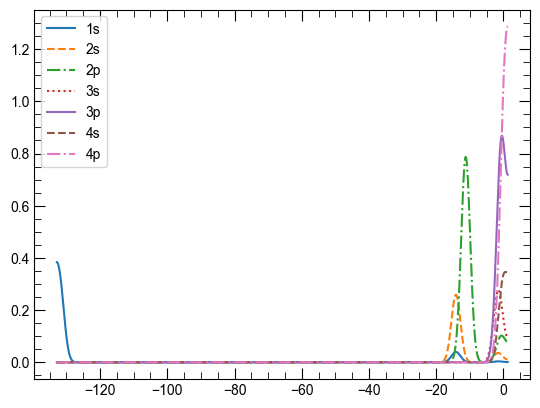

In [ ]:
fig, ax = plt.subplots()
linestyles = ["-", "--", "-.", ":"]
ax.plot(pdos_up["energy"], pdos_up["1s"], label="1s", linestyle=linestyles[0])
ax.plot(pdos_up["energy"], pdos_up["2s"], label="2s", linestyle=linestyles[1])
ax.plot(
    pdos_up["energy"],
    pdos_up["2px"] + pdos_up["2py"] + pdos_up["2pz"],
    label="2p",
    linestyle=linestyles[2],
)
ax.plot(pdos_up["energy"], pdos_up["3s"], label="3s", linestyle=linestyles[3])
ax.plot(
    pdos_up["energy"],
    pdos_up["3px"] + pdos_up["3py"] + pdos_up["3pz"],
    label="3p",
    linestyle=linestyles[0],
)
ax.plot(pdos_up["energy"], pdos_up["4s"], label="4s", linestyle=linestyles[1])
ax.plot(
    pdos_up["energy"],
    pdos_up["4px"] + pdos_up["4py"] + pdos_up["4pz"],
    label="4p",
    linestyle=linestyles[2],
)
ax.legend()
fig.savefig("pdos.pdf")

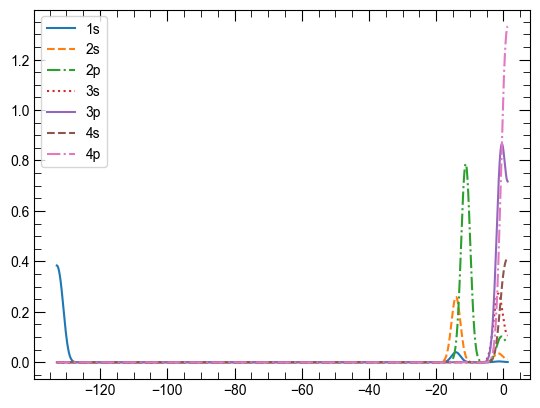

In [ ]:
fig, ax = plt.subplots()
linestyles = ["-", "--", "-.", ":"]
ax.plot(pdos_dn["energy"], pdos_dn["1s"], label="1s", linestyle=linestyles[0])
ax.plot(pdos_dn["energy"], pdos_dn["2s"], label="2s", linestyle=linestyles[1])
ax.plot(
    pdos_dn["energy"],
    pdos_dn["2px"] + pdos_dn["2py"] + pdos_dn["2pz"],
    label="2p",
    linestyle=linestyles[2],
)
ax.plot(pdos_dn["energy"], pdos_dn["3s"], label="3s", linestyle=linestyles[3])
ax.plot(
    pdos_dn["energy"],
    pdos_dn["3px"] + pdos_dn["3py"] + pdos_dn["3pz"],
    label="3p",
    linestyle=linestyles[0],
)
ax.plot(pdos_dn["energy"], pdos_dn["4s"], label="4s", linestyle=linestyles[1])
ax.plot(
    pdos_dn["energy"],
    pdos_dn["4px"] + pdos_dn["4py"] + pdos_dn["4pz"],
    label="4p",
    linestyle=linestyles[2],
)
ax.legend()
fig.savefig("pdos.pdf")

In [ ]:
hartree_fock.vec_up

array([[-9.92209483e-01, -3.93829384e-01, -2.03959515e-09,
        -8.52674951e-12,  2.53901402e-12,  1.18697286e-01,
        -4.28715758e-09, -3.32662437e-12,  1.80781000e-12,
         4.10922462e-02, -9.90405707e-09, -1.17929444e-11,
        -4.26848810e-11],
       [-2.15299164e-02,  1.04929100e+00,  5.55086763e-09,
         2.32060113e-11, -6.91006088e-12, -3.78310891e-01,
         1.38302724e-08,  1.07316141e-11, -5.83195380e-12,
        -1.35228875e-01,  3.25199973e-08,  3.87221639e-11,
         1.40155919e-10],
       [ 2.05960901e-11, -2.83581729e-09,  5.70710923e-01,
        -5.20601657e-01, -6.12815629e-01,  5.94875155e-09,
         1.84392305e-01, -2.53004382e-01, -6.16554934e-02,
        -1.97090867e-08, -9.73106650e-02,  8.96416036e-02,
         1.02870216e-01],
       [ 2.05960904e-11, -2.83581742e-09,  5.71354300e-01,
        -2.66222817e-01,  7.58260980e-01,  5.94875165e-09,
         1.84270434e-01,  7.33887466e-02,  2.49943270e-01,
        -1.97090867e-08, -9.62541259e